<a href="https://colab.research.google.com/github/MerveSevim44/tooth_dency_object_detection/blob/main/dental_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive; drive.mount('/content/drive')

OBJDET_ROOT = "/content/drive/MyDrive/Dental OPG XRAY Dataset"
ORIG_FLAT   = "/content/drive/MyDrive/Dental OPG XRAY Dataset/Dental OPG (Object Detection)/Original Dataset"
AUG_ROOT    = "/content/drive/MyDrive/Dental OPG XRAY Dataset/Dental OPG (Object Detection)/Augmented Dataset"
DST_BIN     = "/content/drive/MyDrive/dataset_binary"  # ÜZERİNE YAZILACAK

import os, shutil, random
def rebuild_binary(orig_flat_dir, dst_root, aug_root, include_aug_train=True, split=(0.8,0.1,0.1)):
    if os.path.isdir(dst_root): shutil.rmtree(dst_root)
    for p in ["images/train","images/val","images/test","labels/train","labels/val","labels/test"]:
        os.makedirs(os.path.join(dst_root,p), exist_ok=True)

    def map_line(s):
        p=s.strip().split();
        if len(p)!=5: return None
        p[0] = "1" if int(p[0])==1 else "0"  # Caries->1, diğerleri->0
        return " ".join(p)

    # split
    exts = (".jpg",".jpeg",".png")
    imgs=[f for f in os.listdir(orig_flat_dir) if f.lower().endswith(exts)]
    imgs.sort(); random.seed(42); random.shuffle(imgs)
    n=len(imgs); n_tr=int(n*split[0]); n_val=int(n*split[1])
    splits={"train":imgs[:n_tr], "val":imgs[n_tr:n_tr+n_val], "test":imgs[n_tr+n_val:]}

    for sp, lst in splits.items():
        for im in lst:
            stem,ext=os.path.splitext(im)
            os.system(f'cp "{os.path.join(orig_flat_dir,im)}" "{os.path.join(dst_root,"images",sp,im)}"')
            # map labels
            src = os.path.join(orig_flat_dir,stem+".txt")
            out = os.path.join(dst_root,"labels",sp,stem+".txt")
            lines=[]
            if os.path.exists(src):
                for ln in open(src,encoding="utf-8"):
                    m=map_line(ln);
                    if m: lines.append(m)
            open(out,"w",encoding="utf-8").write("\n".join(lines))

    if include_aug_train and os.path.isdir(aug_root):
        imgd=os.path.join(aug_root,"train","images")
        lbld=os.path.join(aug_root,"train","labels")
        if os.path.isdir(imgd) and os.path.isdir(lbld):
            for f in os.listdir(imgd):
                if f.lower().endswith(exts):
                    os.system(f'cp "{os.path.join(imgd,f)}" "{os.path.join(dst_root,"images","train",f)}"')
            for f in os.listdir(lbld):
                if f.endswith(".txt"):
                    lines=[]
                    for ln in open(os.path.join(lbld,f),encoding="utf-8"):
                        m=map_line(ln);
                        if m: lines.append(m)
                    open(os.path.join(dst_root,"labels","train",f),"w",encoding="utf-8").write("\n".join(lines))
            print("[AUG] Augmented/train train’e eklendi.")
        else:
            print("[UYARI] Augmented/train/images|labels yok.")

    open(os.path.join(dst_root,"dataset.yaml"),"w").write(f"""path: {dst_root}
train: images/train
val: images/val
test: images/test
nc: 2
names: [Non-Caries, Caries]
""")
    print("✅ dataset_binary hazır:", dst_root)

rebuild_binary(ORIG_FLAT, DST_BIN, AUG_ROOT, include_aug_train=True)


[AUG] Augmented/train train’e eklendi.
✅ dataset_binary hazır: /content/drive/MyDrive/dataset_binary


In [ ]:
# Temizle
!pip -q uninstall -y opencv-python-headless opencv-contrib-python

# NumPy 2 hattı + GUI'li OpenCV
!pip -q install --upgrade --force-reinstall \
  "numpy==2.0.2" \
  "opencv-python==4.10.0.84" \
  "albumentations==2.0.8" \
  "albucore==0.0.24"



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.2/105.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.4/369.4 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.9/444.9 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np, cv2, albumentations as A
print("NumPy:", np.__version__)
print("OpenCV:", cv2.__version__, cv2.__file__)
print("Albumentations:", A.__version__)


NumPy: 2.0.2
OpenCV: 4.10.0 /usr/local/lib/python3.12/dist-packages/cv2/__init__.py
Albumentations: 2.0.8


In [ ]:
#!pip -q install numpy==1.26.4 albumentations opencv-python-headless albucore
import os, glob, cv2, albumentations as A
import numpy as np
from typing import List, Tuple, Dict, Any

# --- Define paths and parameters ---
ROOT = "/content/drive/MyDrive/dataset_binary"
TRAIN_IMG_DIR = f"{ROOT}/images/train"
TRAIN_LABEL_DIR = f"{ROOT}/labels/train"
N_AUG_PER_POS = 3 # Number of augmented images to create for each positive example

# --- Helper Functions ---
def read_yolo_label(label_path: str) -> Tuple[List[List[float]], List[int]]:
    """Reads YOLO formatted labels from a file."""
    boxes, labels = [], []
    if os.path.exists(label_path):
        with open(label_path, encoding="utf-8") as f:
            for line in f:
                s = line.strip().split()
                if len(s) == 5:
                    labels.append(int(s[0]))
                    boxes.append([float(s[1]), float(s[2]), float(s[3]), float(s[4])])
    return boxes, labels

def write_yolo_label(label_path: str, boxes: List[List[float]], labels: List[int]) -> None:
    """Writes YOLO formatted labels to a file."""
    with open(label_path, "w", encoding="utf-8") as f:
        for c, (x, y, w, h) in zip(labels, boxes):
            f.write(f"{c} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

def clip_yolo_box(bbox: List[float]) -> List[float]:
    """Clips YOLO bbox coordinates (x_c, y_c, w, h) to the [0.0, 1.0] range."""
    x_c, y_c, w, h = bbox
    x_c = np.clip(x_c, 0.0, 1.0)
    y_c = np.clip(y_c, 0.0, 1.0)
    w = np.clip(w, 0.0, 1.0)
    h = np.clip(h, 0.0, 1.0)
    return [x_c, y_c, w, h]

def apply_augmentation(image: np.ndarray, bboxes: List[List[float]], labels: List[int], augmenter: A.Compose) -> Tuple[np.ndarray, List[List[float]], List[int]]:
    """Adds a secret token and applies augmentations to an image and its bounding boxes."""
    try:
        transformed = augmenter(image=image, bboxes=bboxes, class_labels=labels)
        augmented_boxes = [clip_yolo_box(bbox) for bbox in transformed['bboxes']]
        augmented_labels = transformed['class_labels'][:len(augmented_boxes)] # Sync labels with boxes
        return transformed['image'], augmented_boxes, augmented_labels
    except Exception as e:
        # Optionally log the error or the file that caused it
        # print(f"[SKIP] Error applying augmentation: {e}")
        return None, [], []

# --- Augmentation Pipeline ---
# Defined outside the loop as it doesn't change per image
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=15, p=0.8, border_mode=cv2.BORDER_REFLECT_101),
    A.ShiftScaleRotate(shift_limit=0.10, scale_limit=0.10, rotate_limit=0,
                       p=0.8, border_mode=cv2.BORDER_REFLECT_101),
    A.RandomBrightnessContrast(brightness_limit=0.10, contrast_limit=0.0, p=0.8),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8,8), p=0.5),
], bbox_params=A.BboxParams(
        format='yolo',
        label_fields=['class_labels'],
        min_area=0,
        min_visibility=0
    )
)

# --- Find images with Caries (class label 1) ---
positive_examples = []
for img_path in glob.glob(os.path.join(TRAIN_IMG_DIR, "*")):
    stem = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(TRAIN_LABEL_DIR, stem + ".txt")
    _, labels = read_yolo_label(label_path)
    if 1 in labels: # Check if class label 1 (Caries) exists
        positive_examples.append((img_path, label_path))

print(f"Number of images containing Caries: {len(positive_examples)}")

# --- Apply Augmentation to Positive Examples ---
for img_path, label_path in positive_examples:
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        # Skip if image cannot be read
        continue
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    boxes, labels = read_yolo_label(label_path)

    for k in range(N_AUG_PER_POS):
        augmented_img, augmented_boxes, augmented_labels = apply_augmentation(
            img_rgb, boxes, labels, augmentation_pipeline
        )

        if augmented_img is None or not augmented_boxes:
            # Skip if augmentation failed or resulted in no bounding boxes
            continue

        stem = os.path.splitext(os.path.basename(img_path))[0]
        out_img_path = os.path.join(TRAIN_IMG_DIR, f"{stem}_aug{k+1}.jpg")
        out_label_path = os.path.join(TRAIN_LABEL_DIR, f"{stem}_aug{k+1}.txt")

        # Save the augmented image and labels
        cv2.imwrite(out_img_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR),
                    [int(cv2.IMWRITE_JPEG_QUALITY), 95])
        write_yolo_label(out_label_path, augmented_boxes, augmented_labels)

print("✅ Targeted Caries augmentation complete.")

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Number of images containing Caries: 126
✅ Targeted Caries augmentation complete.


In [ ]:
!pip -q install ultralytics
from ultralytics import YOLO
DATA = "/content/drive/MyDrive/dataset_binary/dataset.yaml"

HYP = "/content/hyp_binary.yaml"
open(HYP,"w").write("""\
degrees: 15.0
translate: 0.10
scale: 0.10
fliplr: 0.5
hsv_v: 0.10
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0
""")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


105

In [ ]:
model = YOLO("yolov8s.pt")
model.train(data=r"/content/drive/MyDrive/dataset_binary/dataset.yaml", imgsz=640, epochs=200, patience=25,
            degrees=15.0, translate=0.10, scale=0.10, fliplr=0.5, hsv_v=0.10, mosaic=1.0)

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dataset_binary/dataset.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.1, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=25, perspective=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d054efa9370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
import os, glob

ROOT = "/content/drive/MyDrive/dataset_binary/labels"  # kendi yolun
def list_caries(split):
    out=[]
    for p in glob.glob(os.path.join(ROOT, split, "*.txt")):
        with open(p, "r", encoding="utf-8") as f:
            if any(line.startswith("1 ") for line in f):
                out.append(os.path.splitext(os.path.basename(p))[0])
    return out

val_caries  = list_caries("val")
train_caries= list_caries("train")
print("VAL caries sayısı:", len(val_caries))
print("VAL örnekler:", val_caries[:5])
print("TRAIN caries sayısı:", len(train_caries))
print("TRAIN örnekler:", train_caries[:5])


VAL caries sayısı: 1
VAL örnekler: ['8']
TRAIN caries sayısı: 126
TRAIN örnekler: ['68', '84', '205', '188', '85']


Results saved to /content/runs/detect/predict


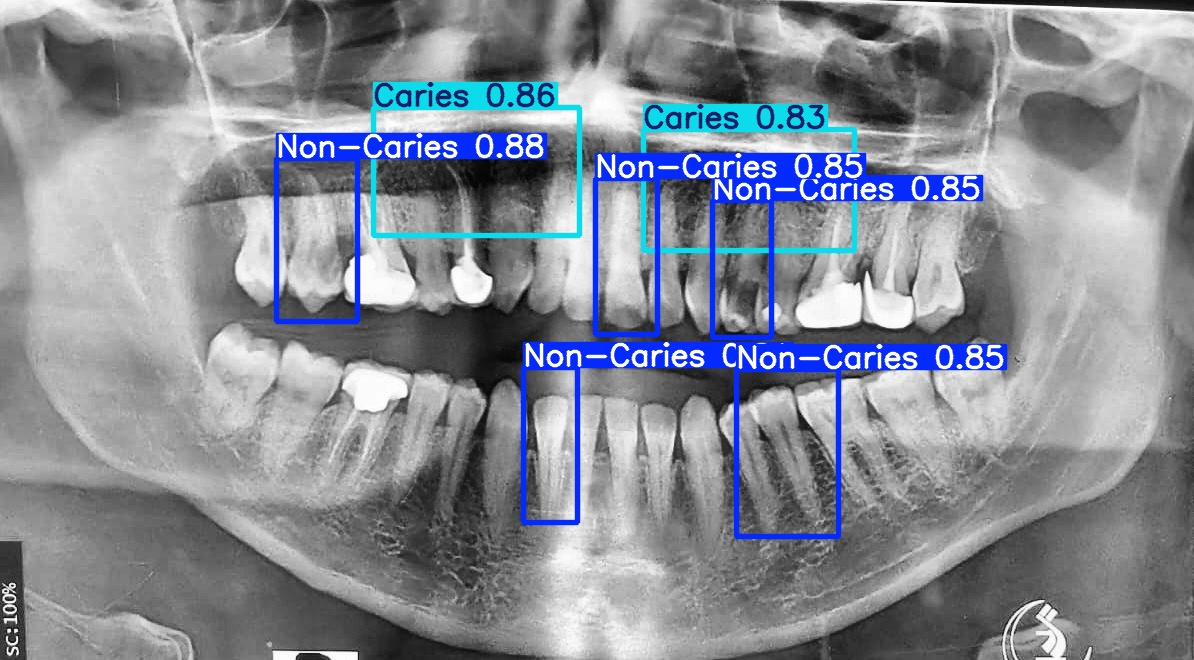

In [ ]:
from ultralytics import YOLO
import glob, os
from IPython.display import Image, display

BEST = sorted(glob.glob("runs/detect/train*/weights/best.pt"))[-1]
model = YOLO(BEST)

stem = (val_caries or train_caries)[0]  # val varsa onu, yoksa train
IMG = f"/content/drive/MyDrive/dataset_binary/images/{'val' if stem in val_caries else 'train'}/{stem}.jpg"

res = model.predict(source=IMG, conf=0.25, save=True, imgsz=640, verbose=False)
pred_dir = sorted(glob.glob("runs/detect/predict*"))[-1]
display(Image(filename=os.path.join(pred_dir, os.path.basename(IMG))))


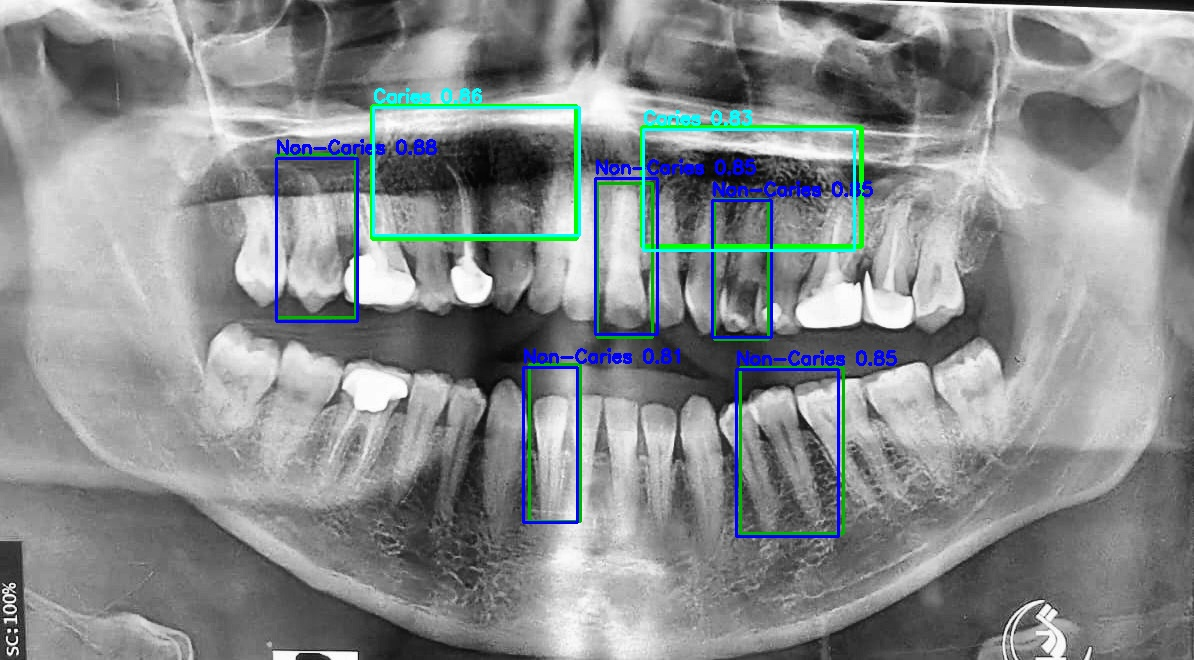

In [ ]:
# === parametreleri ayarla ===
IMG_STEM = (val_caries or train_caries)[0] # ör: 153.jpg ise "153"
SPLIT = "val"     # bu görsel val mi train mi? ona göre "val" veya "train" yaz
CONF  = 0.60
IOU_NMS = 0.50

from ultralytics import YOLO
import glob, os, cv2
import numpy as np
from IPython.display import display, Image as IPyImage

DATA_ROOT = "/content/drive/MyDrive/dataset_binary"
IMG_PATH  = f"{DATA_ROOT}/images/{SPLIT}/{IMG_STEM}.jpg"
LBL_PATH  = f"{DATA_ROOT}/labels/{SPLIT}/{IMG_STEM}.txt"
BEST = sorted(glob.glob("runs/detect/train*/weights/best.pt"))[-1]

# --- tahmin ---
model = YOLO(BEST)
pred = model.predict(source=IMG_PATH, conf=CONF, iou=IOU_NMS, verbose=False)[0]
p_xyxy = pred.boxes.xyxy.cpu().numpy().astype(int)
p_cls  = pred.boxes.cls.cpu().numpy().astype(int)
p_conf = pred.boxes.conf.cpu().numpy()

# --- GT'yi oku (YOLO xywh -> piksel xyxy) ---
img = cv2.imread(IMG_PATH); h, w = img.shape[:2]
gt = []
if os.path.exists(LBL_PATH):
    with open(LBL_PATH, "r") as f:
        for ln in f:
            c,x,y,ww,hh = ln.split()
            c = int(c); x=float(x)*w; y=float(y)*h; ww=float(ww)*w; hh=float(hh)*h
            x1=int(x-ww/2); y1=int(y-hh/2); x2=int(x+ww/2); y2=int(y+hh/2)
            gt.append((c, x1,y1,x2,y2))
gt = np.array(gt, dtype=int) if gt else np.zeros((0,5), dtype=int)

# --- görsel üstüne çiz ---
viz = img.copy()
# GT: yeşil (Caries=1 ise daha kalın)
for c,x1,y1,x2,y2 in gt:
    color = (0,255,0) if c==1 else (0,180,0)
    thick = 3 if c==1 else 2
    cv2.rectangle(viz, (x1,y1), (x2,y2), color, thick)
# Pred: Caries camgöbeği, Non-Caries mavi
for (x1,y1,x2,y2),c,cf in zip(p_xyxy, p_cls, p_conf):
    color = (255,255,0) if c==1 else (255,0,0)
    lbl = ("Caries" if c==1 else "Non-Caries") + f" {cf:.2f}"
    cv2.rectangle(viz, (x1,y1), (x2,y2), color, 2)
    cv2.putText(viz, lbl, (x1, max(15,y1-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

tmp="/content/_overlay.jpg"; cv2.imwrite(tmp, viz)
display(IPyImage(filename=tmp))


In [ ]:
def iou(a, b):
    # a=[x1,y1,x2,y2], b=[x1,y1,x2,y2]
    xa1,ya1,xa2,ya2 = a; xb1,yb1,xb2,yb2 = b
    inter = max(0, min(xa2,xb2)-max(xa1,xb1)) * max(0, min(ya2,yb2)-max(ya1,yb1))
    area_a = max(0, xa2-xa1) * max(0, ya2-ya1)
    area_b = max(0, xb2-xb1) * max(0, yb2-yb1)
    union = area_a + area_b - inter + 1e-9
    return inter/union

IOU_TH = 0.5
# ayrı diziler
gt_car = [g[1:] for g in gt if g[0]==1]
gt_non = [g[1:] for g in gt if g[0]==0]
pr_car = [b for (b,c) in zip(p_xyxy,p_cls) if c==1]
pr_non = [b for (b,c) in zip(p_xyxy,p_cls) if c==0]

def match_counts(gt_boxes, pr_boxes):
    used=set(); tp=0
    for g in gt_boxes:
        best=-1; best_iou=0
        for j,b in enumerate(pr_boxes):
            if j in used: continue
            v=iou(g,b)
            if v>best_iou: best_iou=v; best=j
        if best_iou>=IOU_TH and best!=-1:
            tp+=1; used.add(best)
    fp = len(pr_boxes)-len(used)
    fn = len(gt_boxes)-tp
    return tp, fp, fn

tp_c, fp_c, fn_c = match_counts(gt_car, pr_car)
tp_n, fp_n, fn_n = match_counts(gt_non, pr_non)

print(f"Caries   → TP:{tp_c}  FP:{fp_c}  FN:{fn_c}")
print(f"Non-C.   → TP:{tp_n}  FP:{fp_n}  FN:{fn_n}")


Caries   → TP:2  FP:0  FN:0
Non-C.   → TP:5  FP:0  FN:0


In [ ]:
from ultralytics import YOLO
import glob, numpy as np
DATA = "/content/drive/MyDrive/dataset_binary/dataset.yaml"
BEST = sorted(glob.glob("runs/detect/train*/weights/best.pt"))[-1]
model = YOLO(BEST)

def metrics_from_cm(cm):
    cm=cm.astype(float); TP=np.diag(cm); FP=cm.sum(0)-TP; FN=cm.sum(1)-TP
    prec=TP/(TP+FP+1e-9); rec=TP/(TP+FN+1e-9); f1=2*prec*rec/(prec+rec+1e-9)
    return {"acc":TP.sum()/cm.sum(), "prec":prec, "rec":rec, "f1":f1}

for split in ["val","test"]:
    r = model.val(data=DATA, split=split, conf=0.60, iou=0.50, verbose=False)
    m = metrics_from_cm(r.confusion_matrix.matrix)
    print(f"\n== {split.upper()} ==")
    print("Accuracy:", m["acc"])
    print("Non-Caries  P={:.3f} R={:.3f} F1={:.3f}".format(m["prec"][0], m["rec"][0], m["f1"][0]))
    print("Caries      P={:.3f} R={:.3f} F1={:.3f}".format(m["prec"][1], m["rec"][1], m["f1"][1]))


Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 91.2±28.6 MB/s, size: 207.9 KB)
val: Scanning /content/drive/MyDrive/dataset_binary/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 40.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.5it/s 1.3s
                   all         23        116      0.979      0.947      0.967      0.842
Speed: 4.7ms preprocess, 20.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/runs/detect/val

== VAL ==
Accuracy: 0.8524590163934426
Non-Caries  P=0.895 R=0.944 F1=0.919
Caries      P=1.000 R=1.000 F1=1.000
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 52.7±24.6 MB/s, siz

In [ ]:
# val ve test tahminlerini kaydet (kutulu görseller)
!yolo predict model="{BEST}" source="/content/drive/MyDrive/dataset_binary/images/val"  conf=0.60 save=True
!yolo predict model="{BEST}" source="/content/drive/MyDrive/dataset_binary/images/test" conf=0.60 save=True


Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/23 /content/drive/MyDrive/dataset_binary/images/val/10.jpg: 352x640 4 Non-Cariess, 66.5ms
image 2/23 /content/drive/MyDrive/dataset_binary/images/val/135.jpg: 320x640 3 Non-Cariess, 62.5ms
image 3/23 /content/drive/MyDrive/dataset_binary/images/val/136.jpg: 320x640 4 Non-Cariess, 10.5ms
image 4/23 /content/drive/MyDrive/dataset_binary/images/val/146.jpg: 320x640 3 Non-Cariess, 10.5ms
image 5/23 /content/drive/MyDrive/dataset_binary/images/val/151.jpg: 320x640 7 Non-Cariess, 10.4ms
image 6/23 /content/drive/MyDrive/dataset_binary/images/val/166.jpg: 352x640 8 Non-Cariess, 11.7ms
image 7/23 /content/drive/MyDrive/dataset_binary/images/val/184.jpg: 320x640 (no detections), 13.6ms
image 8/23 /content/drive/MyDrive/dataset_binary/images/val/185.jpg: 384x640 4 Non-Cariess, 71.8ms
image 9/23 /content/drive/MyDrive/dataset

In [ ]:
from ultralytics import YOLO
import csv, pathlib, glob
model = YOLO(BEST)
def has_caries_dir(img_dir, conf=0.60):
    rows=[("image_name","has_caries_0or1")]
    for r in model.predict(source=img_dir, conf=conf, verbose=False):
        name = pathlib.Path(r.path).name
        has = any(int(c)==1 for c in r.boxes.cls.cpu().numpy()) if len(r.boxes)>0 else False
        rows.append((name, int(has)))
    return rows

rows_val  = has_caries_dir("/content/drive/MyDrive/dataset_binary/images/val")
rows_test = has_caries_dir("/content/drive/MyDrive/dataset_binary/images/test")
with open("/content/val_has_caries.csv","w",newline="",encoding="utf-8") as f: csv.writer(f).writerows(rows_val)
with open("/content/test_has_caries.csv","w",newline="",encoding="utf-8") as f: csv.writer(f).writerows(rows_test)
print("CSV’ler: /content/val_has_caries.csv, /content/test_has_caries.csv")


CSV’ler: /content/val_has_caries.csv, /content/test_has_caries.csv


In [ ]:
import os, glob, shutil

ROOT = "/content/drive/MyDrive/dataset_binary"
IMG = lambda s: f"{ROOT}/images/{s}"
LBL = lambda s: f"{ROOT}/labels/{s}"

def stems_with_caries(split):
    out=[]
    for p in glob.glob(os.path.join(LBL(split), "*.txt")):
        with open(p, "r", encoding="utf-8") as f:
            if any(line.startswith("1 ") for line in f):
                out.append(os.path.splitext(os.path.basename(p))[0])
    return out

def move_pair(stem, src, dst):
    # görüntü uzantısını bul
    found=None
    for ext in [".jpg",".jpeg",".png",".JPG",".JPEG",".PNG"]:
        p = os.path.join(IMG(src), stem+ext)
        if os.path.exists(p):
            found=p; break
    if not found:
        print("[UYARI] Görsel yok:", stem); return False
    shutil.move(found, os.path.join(IMG(dst), os.path.basename(found)))
    shutil.move(os.path.join(LBL(src), stem+".txt"),
                os.path.join(LBL(dst), stem+".txt"))
    return True

K = 6  # test’te görmek istediğin caries örnek sayısı
cand = stems_with_caries("train")[:K]
moved = sum(move_pair(s, "train", "test") for s in cand)
print(f"Taşınan Caries pozitif test örneği: {moved}")


Taşınan Caries pozitif test örneği: 6


In [ ]:
from ultralytics import YOLO
import glob
DATA = "/content/drive/MyDrive/dataset_binary/dataset.yaml"
BEST = sorted(glob.glob("runs/detect/train*/weights/best.pt"))[-1]
!yolo val model="{BEST}" data="{DATA}" split=test conf=0.60 iou=0.50


Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 107.0±78.5 MB/s, size: 305.5 KB)
val: Scanning /content/drive/MyDrive/dataset_binary/labels/test... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 141.9it/s 0.2s
val: New cache created: /content/drive/MyDrive/dataset_binary/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.4it/s 1.4s
                   all         30        155      0.993      0.962      0.978      0.825
            Non-Caries         30        146      0.985      0.925      0.961      0.815
                Caries          6          9          1          1      0.995      0.834
Speed: 3.6ms preprocess, 20.9ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to /content/runs/detect/val3
💡 Learn mo

In [ ]:
import glob
DATA = "/content/drive/MyDrive/dataset_binary/dataset.yaml"
BEST = sorted(glob.glob("runs/detect/train*/weights/best.pt"))[-1]; BEST

'runs/detect/train/weights/best.pt'

In [ ]:
!yolo val model="{BEST}" data="{DATA}"

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 95.0±57.2 MB/s, size: 210.5 KB)
val: Scanning /content/drive/MyDrive/dataset_binary/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 356.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         23        116      0.915      0.943      0.972      0.838
            Non-Caries         23        114      0.902      0.886      0.949      0.731
                Caries          1          2      0.929          1      0.995      0.945
Speed: 4.7ms preprocess, 24.6ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
from ultralytics import YOLO
import numpy as np

CLASS_NAMES = ["Non-Caries","Caries"]
model = YOLO(BEST)

def metrics_from_cm(cm):
    cm = cm.astype(float)
    TP = np.diag(cm); FP = cm.sum(0) - TP; FN = cm.sum(1) - TP
    prec = TP/(TP+FP+1e-9); rec = TP/(TP+FN+1e-9); f1 = 2*prec*rec/(prec+rec+1e-9)
    return {
        "per_class": (prec, rec, f1),
        "macro": (prec.mean(), rec.mean(), f1.mean()),
        "acc": TP.sum()/cm.sum()
    }

confs = [0.05,0.10,0.15,0.20,0.25,0.30,0.40,0.50,0.60,0.75]
rows=[]
for c in confs:
    r = model.val(data=DATA, conf=c, iou=0.5, verbose=False)
    m = metrics_from_cm(r.confusion_matrix.matrix)
    rows.append((c, m["acc"], *m["macro"]))

print("conf |  acc  | P_macro | R_macro | F1_macro")
for c,acc,P,R,F1 in sorted(rows, key=lambda x: x[-1], reverse=True):
    print(f"{c:>4.2f} | {acc:>5.3f} |  {P:>6.3f} |  {R:>6.3f} |   {F1:>6.3f}")

best_conf = sorted(rows, key=lambda x: x[-1], reverse=True)[0][0]
print("\nÖnerilen conf:", best_conf)


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 88.2±20.3 MB/s, size: 207.9 KB)
val: Scanning /content/drive/MyDrive/dataset_binary/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 37.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.6it/s 1.3s
                   all         23        116      0.948      0.956      0.973      0.851
Speed: 3.6ms preprocess, 20.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to /content/runs/detect/val2
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 87.0±40.0 MB/s, size: 224.8 KB)
val: Scanning /content/drive/MyDrive/dataset_binary/labels/val.cache... 23 images, 0 backgrounds, 0 

In [ ]:
r = model.val(data=DATA, conf=float(best_conf), iou=0.5, verbose=False)
cm = r.confusion_matrix.matrix
prec, rec, f1 = metrics_from_cm(cm)["per_class"]
print("Overall Acc:", metrics_from_cm(cm)["acc"])
for i,name in enumerate(CLASS_NAMES):
    print(f"{name:10s}  P={prec[i]:.3f}  R={rec[i]:.3f}  F1={f1[i]:.3f}")


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 87.2±37.6 MB/s, size: 222.6 KB)
val: Scanning /content/drive/MyDrive/dataset_binary/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 39.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.2it/s 0.9s
                   all         23        116      0.952      0.956      0.967       0.85
Speed: 3.1ms preprocess, 7.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/runs/detect/val12
Overall Acc: 0.8346456692913385
Non-Caries  P=0.912  R=0.904  F1=0.908
Caries      P=1.000  R=1.000  F1=1.000


Run klasörü: runs/detect/train


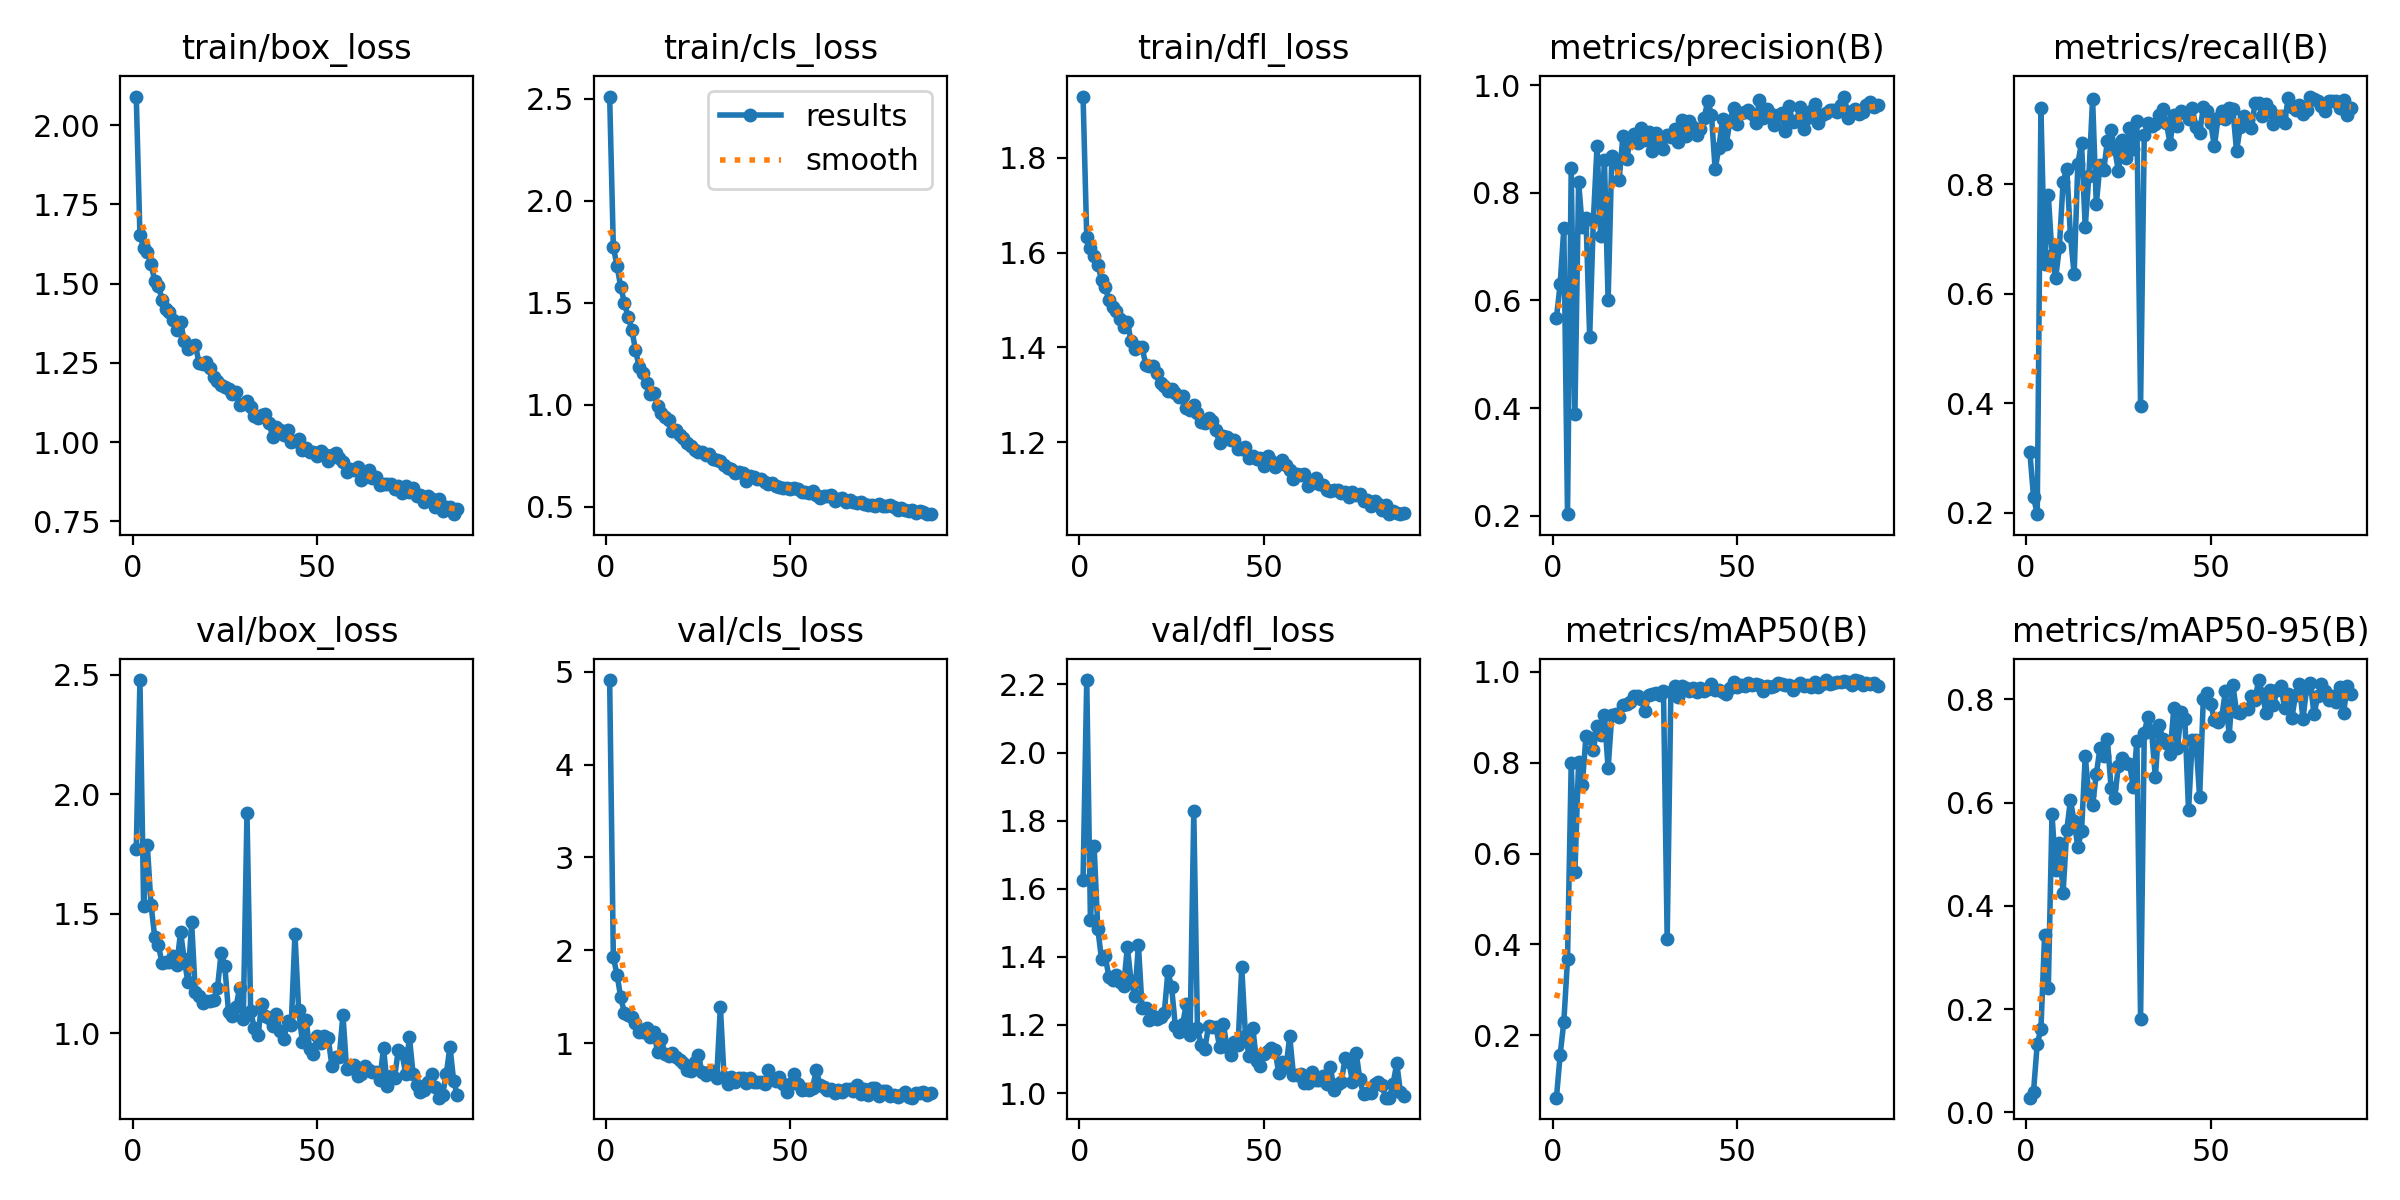

In [ ]:
import glob
from IPython.display import Image, display

RUN = sorted(glob.glob("runs/detect/train*"))[-1]
print("Run klasörü:", RUN)

# hazır grafik
display(Image(filename=f"{RUN}/results.png"))
